In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import numpy as np

# Change the path in the following cell to your working directory.

## This jupyter notebook should be in a subfolder working_dir/source.
## The data file should be in a subfolder working_dir/data.


In [2]:
# Change the path to you workng directory.
# This jupyter notebook should be in a subfolder <working_dir>/source.
# The data file should be in a subfolder <working_dir>/data.
os.chdir(os.path.join(os.path.sep, 'home', 'tkokkeng', 'Documents', 'comfort-study'))
os.getcwd()

'/home/tkokkeng/Documents/comfort-study'

In [3]:
import sys
if os.path.join(os.getcwd(), 'source') not in sys.path:
    sys.path.append(os.path.join(os.getcwd(), 'source'))
sys.path

['/home/tkokkeng/Documents/comfort-study',
 '/home/tkokkeng/Documents/comfort-study/source',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python36.zip',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python3.6',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python3.6/lib-dynload',
 '/usr/lib/python3.6',
 '',
 '/home/tkokkeng/python/python367/comfort-study-venv/lib/python3.6/site-packages',
 '/home/tkokkeng/.local/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/home/tkokkeng/.local/lib/python3.6/site-packages/IPython/extensions',
 '/home/tkokkeng/.ipython']

# Change the file name of the data file in the following cell.

## Load data

In [4]:
# Change the path to the filename of the data file.
all_data = pd.read_excel(io=os.path.join('data', '26mar vs 9 apr.xlsx'), sheet_name=None)

In [5]:
len(all_data)

2

In [6]:
all_data.keys()

odict_keys(['26 Mar', '9 Apr'])

In [7]:
# Check if the data is correctly loaded. Change the key to a key from the above cell.
survey_titles = all_data['26 Mar'].columns.tolist()
survey_titles

['æ—¶é—´æˆ³è®°',
 'Which Zone are you sitting in',
 'What is your gender?',
 'What is your clothing like? ',
 'Do you feel you have adequate rest/sleep the previous night? [`]',
 'Indoor environment perception [Temperature]',
 '` [Air movement]',
 '` [Air Quality]',
 'Indoor Environmental Satisfaction [Temperature]',
 'Indoor Environmental Satisfaction [Air movement]',
 'Indoor Environmental Satisfaction [Air quality]',
 'Indoor Environmental Satisfaction [Overall]',
 'How much do you experience the following [Headaches]',
 'How much do you experience the following [Difficulty in concentration]',
 'How much do you experience the following [Dry skin]',
 'How much do you experience the following [Sleepiness]',
 'How much do you experience the following [Eye irritation]',
 'How much do you experience the following [Throat irritation]',
 'How much do you experience the following [Running nose]',
 'How much do you experience the following [Sneezing/Coughing]']

In [8]:
# Remove the first column which is the timestamp
del survey_titles[:1]
survey_titles

['Which Zone are you sitting in',
 'What is your gender?',
 'What is your clothing like? ',
 'Do you feel you have adequate rest/sleep the previous night? [`]',
 'Indoor environment perception [Temperature]',
 '` [Air movement]',
 '` [Air Quality]',
 'Indoor Environmental Satisfaction [Temperature]',
 'Indoor Environmental Satisfaction [Air movement]',
 'Indoor Environmental Satisfaction [Air quality]',
 'Indoor Environmental Satisfaction [Overall]',
 'How much do you experience the following [Headaches]',
 'How much do you experience the following [Difficulty in concentration]',
 'How much do you experience the following [Dry skin]',
 'How much do you experience the following [Sleepiness]',
 'How much do you experience the following [Eye irritation]',
 'How much do you experience the following [Throat irritation]',
 'How much do you experience the following [Running nose]',
 'How much do you experience the following [Sneezing/Coughing]']

In [9]:
len(survey_titles)

19

In [10]:
zones = list(all_data.keys())
zones

['26 Mar', '9 Apr']

## Determine all classes for each survey

Here, we need to do a manual visual check to get the complete range of values from each survey question. Not all values may not appear in a survey.

In [11]:
# Check the range of values for each column in each tab of the spreadsheet.
for i in survey_titles[:11]:
    print(set(all_data['26 Mar'][i].value_counts().index))

{'Zone 1', 'Zone 3', 'Zone 2', 'Zone 4'}
{'Female', 'Male'}
{'C', 'B', 'D', 'A'}
{'Just sufficient', 'Too little', 'A little under'}
{'Just comfortable', 'Cold', 'A little warm', 'Slightly cool', 'Cool'}
{'Strong', 'Weak', 'Just nice', 'A little weak', 'A little strong', 'Far too strong'}
{'Just acceptable', 'A little smelly/stale', 'Very fresh', 'Smelly/stale', 'A little fresh', 'Fresh'}
{'Dissatisfied', 'Very dissatisfied', 'Somewhat satisfied', 'Very Satisfied', 'Neutral', 'Satisfied', 'Somewhat dissatisfied'}
{'Dissatisfied', 'Very dissatisfied', 'Somewhat satisfied', 'Very Satisfied', 'Neutral', 'Satisfied', 'Somewhat dissatisfied'}
{'Dissatisfied', 'Very dissatisfied', 'Somewhat satisfied', 'Very Satisfied', 'Neutral', 'Satisfied', 'Somewhat dissatisfied'}
{'Dissatisfied', 'Very dissatisfied', 'Somewhat satisfied', 'Very Satisfied', 'Neutral', 'Satisfied', 'Somewhat dissatisfied'}


In [12]:
# Check the range of values for each column in each tab of the spreadsheet.
for i in survey_titles[:11]:
    print(set(all_data['9 Apr'][i].value_counts().index))

{'Zone 2', 'Zone 1', 'Zone 3', 'Zone 4'}
{'Female', 'Male'}
{'C', 'B', 'D', 'A'}
{'Just sufficient', 'Too little', 'A little under'}
{'Cold', 'Slightly cool', 'Cool', 'Just comfortable'}
{'Strong', 'Just nice', 'A little weak', 'A little strong', 'Far too strong'}
{'Just acceptable', 'A little smelly/stale', 'Smelly/stale', 'A little fresh', 'Fresh'}
{'Very dissatisfied', 'Somewhat satisfied', 'Satisfied', 'Neutral', 'Somewhat dissatisfied'}
{'Very dissatisfied', 'Somewhat satisfied', 'Very Satisfied', 'Neutral', 'Satisfied', 'Somewhat dissatisfied'}
{'Dissatisfied', 'Somewhat satisfied', 'Satisfied', 'Neutral', 'Somewhat dissatisfied'}
{'Very dissatisfied', 'Somewhat satisfied', 'Satisfied', 'Neutral', 'Somewhat dissatisfied'}


In [13]:
# Manually set the complete range of values for each survey question after looking through the previous outputs.
class_dict = {}
class_dict[survey_titles[0]] = ['Zone 1', 'Zone 2', 'Zone 3', 'Zone 4']
class_dict[survey_titles[1]] = ['Female', 'Male']
class_dict[survey_titles[2]] = ['A', 'B', 'C', 'D']
class_dict[survey_titles[3]] = ['Too little','A little under', 'Just sufficient', 'A little over', 'Too much']
class_dict[survey_titles[4]] = ['Cold', 'Cool', 'Slightly cool', 'Just comfortable', 'A little warm', 'Warm']
class_dict[survey_titles[5]] = [ 'None', 'Weak', 'A little weak', 'Just nice', 'A little strong', 'Strong', 'Far too strong']
class_dict[survey_titles[6]] = ['Smelly/stale', 'A little smelly/stale', 'Just acceptable', 'A little fresh', 'Fresh', 'Very fresh']

In [14]:
classes = ['Very dissatisfied', 'Dissatisfied', 'Somewhat dissatisfied', 'Neutral', 'Somewhat satisfied', 'Satisfied', 'Very Satisfied']
for title in survey_titles[7:11]:
    class_dict[title] = classes

In [15]:
for title in survey_titles[11:]:
    classes = ['Not at all', 'A little', 'Moderate' , 'Intense']
    class_dict[title] = classes


In [16]:
# Do a quick check.
all_data['26 Mar'][survey_titles[0]].value_counts()

Zone 1    18
Zone 4    15
Zone 2    14
Zone 3     4
Name: Which Zone are you sitting in, dtype: int64

## Plot data

In [17]:
class_by_zone_cnt = np.zeros((len(class_dict.get(survey_titles[0])), len(zones)))
for zone_idx, zone in enumerate(zones):
    val_cnt = all_data[zone][survey_titles[0]].value_counts()
    for cls_idx, cls in enumerate(class_dict.get(survey_titles[0])):
        if cls in val_cnt.index:
            class_by_zone_cnt[cls_idx, zone_idx] = val_cnt[cls]

In [18]:
# Manually shorten the survey questions to fit the plot. To change as needed.
survey_plot_titles = ['Zone', 'Gender', 'Clothing', 'Adequate rest/sleep', 'Perception [Temp]', 'Perception [Air Movement]', 'Perception [Air Quality]',
                      'Satisfaction [Temp]', 'Satisfaction [Air Movement]', 'Satisfaction [Air Quality]', 'Satisfaction [Overall]']
survey_plot_titles = survey_plot_titles + [ i[41:] for i in survey_titles[11:]]
survey_plot_titles

['Zone',
 'Gender',
 'Clothing',
 'Adequate rest/sleep',
 'Perception [Temp]',
 'Perception [Air Movement]',
 'Perception [Air Quality]',
 'Satisfaction [Temp]',
 'Satisfaction [Air Movement]',
 'Satisfaction [Air Quality]',
 'Satisfaction [Overall]',
 '[Headaches]',
 '[Difficulty in concentration]',
 '[Dry skin]',
 '[Sleepiness]',
 '[Eye irritation]',
 '[Throat irritation]',
 '[Running nose]',
 '[Sneezing/Coughing]']

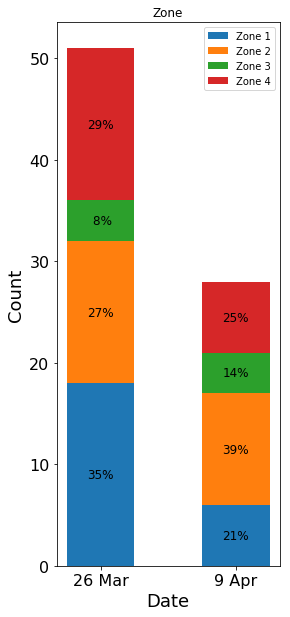

In [19]:
# Plot 1 stacked bat chart to check.
fig = plt.figure(figsize=(4, 10))

bar_width = 0.5
bar_l = np.arange(len(zones))
# tick_pos = [i + (bar_width / 2) for i in bar_l]
tick_pos = [i for i in bar_l]

classes = class_dict.get(survey_titles[0])
ax = []
ax.append(plt.bar(bar_l, class_by_zone_cnt[0], width=bar_width, label=classes[0]))
for cls_idx, cls in enumerate(classes[1:]):
    ax.append(plt.bar(bar_l, class_by_zone_cnt[cls_idx + 1], bottom=class_by_zone_cnt[:cls_idx + 1].sum(axis=0),
                      width=bar_width, label=cls))
# ax.append(plt.bar(bar_l, class_by_zone_cnt[0], width=bar_width, label=cls))
plt.ylabel("Count", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.legend(loc="best")
plt.xticks(tick_pos, zones, fontsize=16, rotation=0)
plt.yticks(fontsize=16)
plt.title(survey_plot_titles[0])

for zone_idx, zone in enumerate(zip(*ax)):
    total_cnt = class_by_zone_cnt[:, zone_idx].sum()
    for cls_idx, cls in enumerate(zone):
        h = cls.get_height()
        if h > 0:
            plt.text(cls.get_x() + cls.get_width() / 2., cls.get_y() + h / 2.,
                     '{:2d}'.format(int(round(class_by_zone_cnt[:, zone_idx][cls_idx] * 100. / total_cnt))) + '%',
                     ha="center", va="center",
                     color="black", fontsize=12)  # , fontweight="bold")
plt.show()


# Change the following parameters as needed before running the next cell.

* 1st line in the cell
	* **num_cols** : number of columns in the plot (e.g. if 4, there will be 4 charts in each row)
	* **output_path** : folder where you want to save the output file. The file will be saved in working_dir/**output_path**/stacked_bar_stack.png

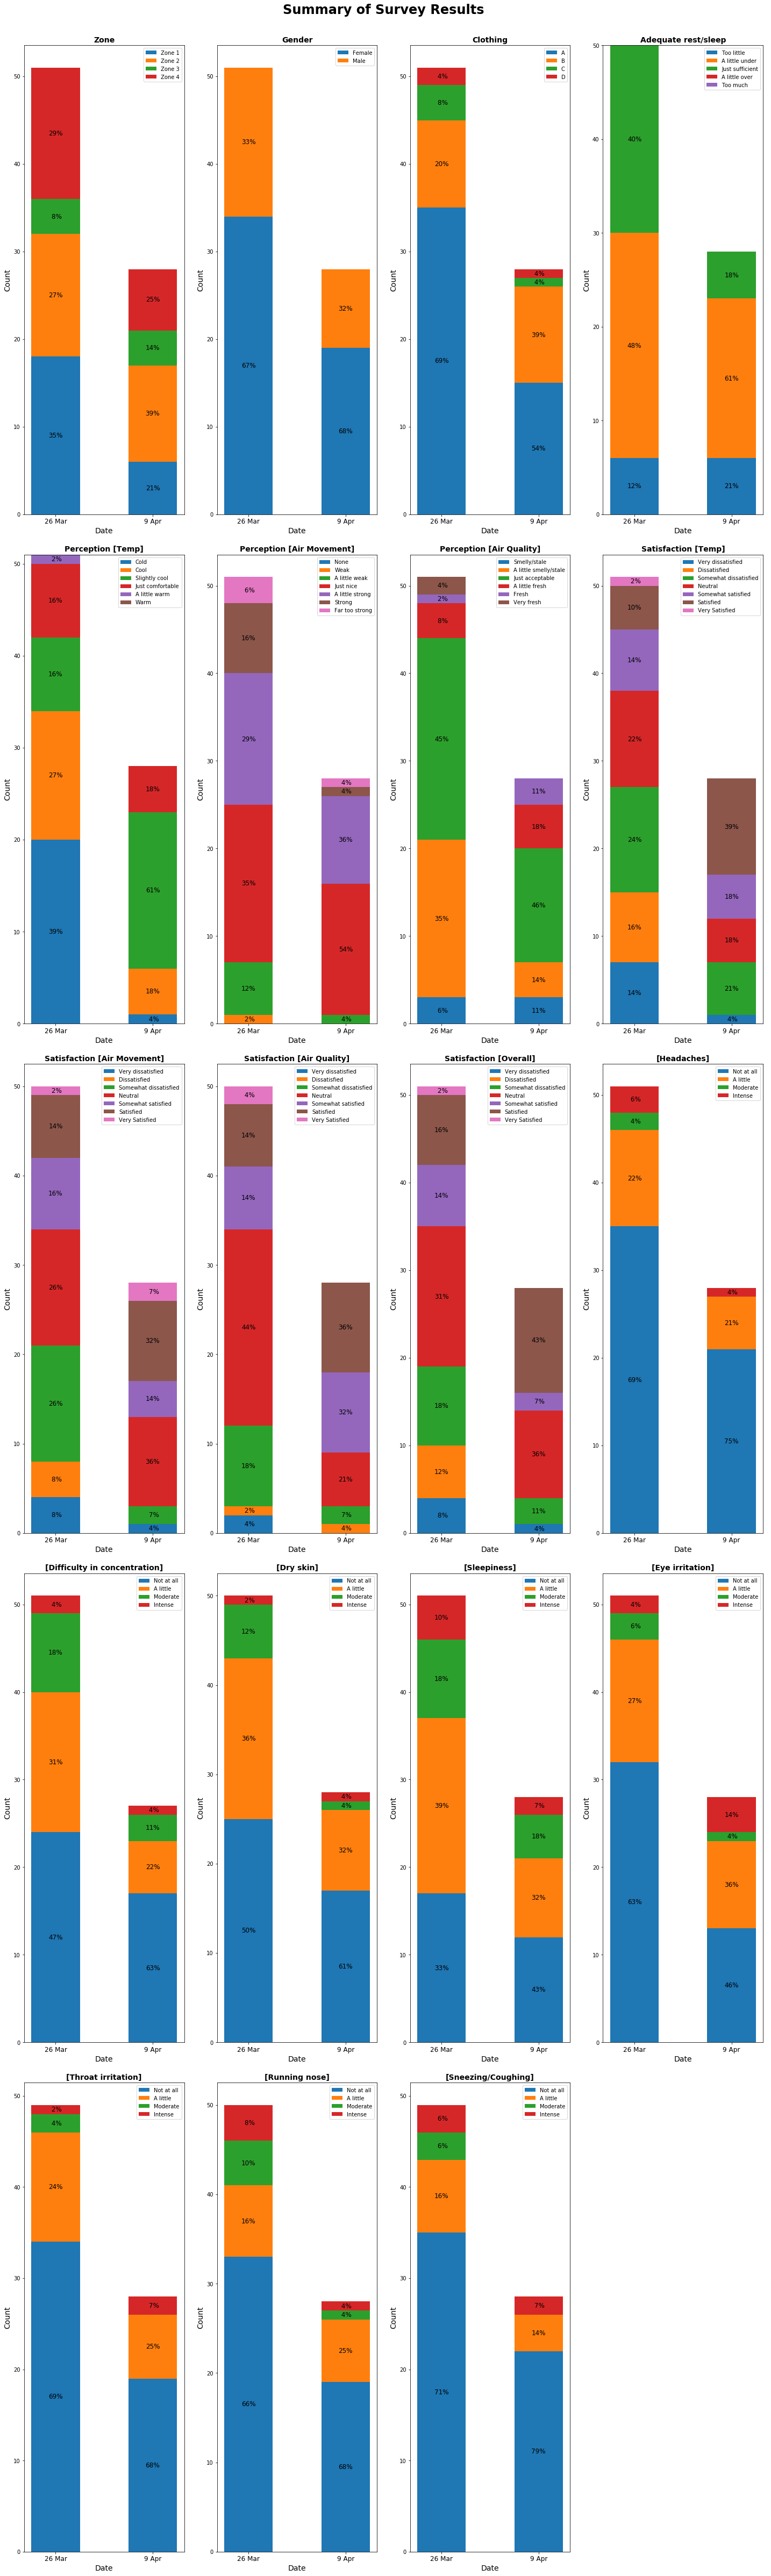

In [20]:
# Plot all the stacked bar charts.

# Parameters to be changed as needed
num_cols = 4
output_path = '10apr'

fig, ax = plt.subplots(nrows=int(np.ceil(len(survey_titles) / num_cols)), ncols=num_cols, figsize=(20, 70))
fig.suptitle('Summary of Survey Results ', fontsize=24, fontweight='bold')
i = 0
done = False
bar_width = 0.5
bar_l = np.arange(len(zones))
# tick_pos = [j + (bar_width / 2) for j in bar_l]
tick_pos = [j for j in bar_l]

for row in ax:
    if not done:
        for col in row:

            class_by_zone_cnt = np.zeros((len(class_dict.get(survey_titles[i])), len(zones)))
            for zone_idx, zone in enumerate(zones):
                val_cnt = all_data[zone][survey_titles[i]].value_counts()
                for cls_idx, cls in enumerate(class_dict.get(survey_titles[i])):
                    if cls in val_cnt.index:
                        class_by_zone_cnt[cls_idx, zone_idx] = val_cnt[cls]
            classes = class_dict.get(survey_titles[i])
            ax1 = []

            ax1.append(col.bar(bar_l, class_by_zone_cnt[0], width=bar_width, label=classes[0]))
            for cls_idx, cls in enumerate(classes[1:]):
                ax1.append(col.bar(bar_l, class_by_zone_cnt[cls_idx + 1], bottom=class_by_zone_cnt[:cls_idx + 1].sum(axis=0),
                                  width=bar_width, label=cls))

            col.set_ylabel("Count", fontsize=14)
            col.set_xlabel("Date", fontsize=14)
            col.legend(loc="best")
            col.set_xticks(tick_pos)
            col.set_xticklabels(zones, fontsize=12, rotation=0)

            # This can be set to change the extent of the y axis
            # col.set_ylim((0, 190))
            
            col.set_title(survey_plot_titles[i], fontsize=14, fontweight='bold')

            for zone_idx, zone in enumerate(zip(*ax1)):
                total_cnt = class_by_zone_cnt[:, zone_idx].sum()
                for cls_idx, cls in enumerate(zone):
                    h = cls.get_height()
                    if h > 0:
                        col.text(cls.get_x() + cls.get_width() / 2., cls.get_y() + h / 2.,
                                 '{:2d}'.format(int(round(class_by_zone_cnt[:, zone_idx][cls_idx] * 100. / total_cnt))) + '%',
                                 ha="center", va="center",
                                 color="black", fontsize=12)  # , fontweight="bold")

            if i < (len(survey_titles) - 1):
                i += 1
            else:
                done = True
                break

if ((i + 1) % num_cols) > 0:
    for j in range((i + 1) % num_cols, num_cols):
        ax[-1][j].axis('off')

plt.tight_layout(rect=[0, .03, 1, .97], pad=1.0, w_pad=2.0, h_pad=2.0)

# Change the path as needed.
if not os.path.exists(output_path):
        os.mkdir(output_path)
plt.savefig(os.path.join(output_path, 'stacked-bar-chart'))

plt.show()
plt.close()